# Practice pandas ,matplotlib and seaborn

## importing libraries and loading data

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import ast

#loading data
datas = load_dataset('lukebarousse/data_jobs')
data = datas['train'].to_pandas()
df = data.copy()

c:\Users\AB\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#cleaning data
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x:ast.literal_eval(x) if pd.notna(x) else x)

### 1

In [28]:
jobs = ['Data Analyst','Data Scientist','Data Engineer']
countries = ['United States', 'Germany', 'India', 'Spain', 'Sudan']

In [85]:
df_data_countries = df[(df['job_title_short'].isin(jobs))&(df['job_country'].isin(countries))]
df_data_countries = df_data_countries.dropna(subset='salary_year_avg')

In [110]:
df_data_countries_size = df_data_countries.pivot_table(index='job_country',columns= 'job_title_short',values='salary_year_avg',aggfunc='count')
df_data_countries_mean =  df_data_countries.pivot_table(index='job_country',columns='job_title_short',values='salary_year_avg',aggfunc='mean')

In [137]:
df_data_countries_US = df_data_countries[df_data_countries['job_country'].isin(countries)].groupby('job_title_short')['salary_year_avg'].agg(['count','median'])
df_data_countries_US = df_data_countries_US.sort_values(by='count',ascending=False)
df_data_countries_US = df_data_countries_US.sort_values(by='median', ascending=False)

In [138]:
df_data_countries_US

,count,median
job_title_short,,
Data Scientist,5271,130000.0
Data Engineer,3659,125000.0
Data Analyst,4645,90000.0


In [111]:
df_data_countries_size.index

Index(['Germany', 'India', 'Spain', 'Sudan', 'United States'], dtype='object', name='job_country')

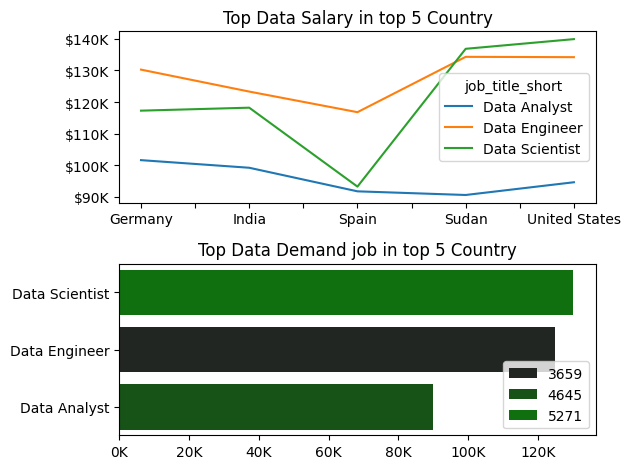

In [141]:
fig,ax = plt.subplots(2,1)

df_data_countries_mean.plot(kind='line',ax=ax[0])
ax[0].set_title('Top Data Salary in top 5 Country')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x,_:f"${int(x/1000)}K"))
#sns.barplot(data=df_data_countries_mean,x=df_data_countries_mean.index,y=df_data_countries_mean.columns,hue=df_data_countries_mean.index,ax=ax[0],palette='dark:r')

sns.barplot(data = df_data_countries_US,y=df_data_countries_US.index,x='median',hue='count',ax=ax[1],palette='dark:g')
ax[1].set_title('Top Data Demand job in top 5 Country')
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x/1000)}K"))

plt.legend()
plt.tight_layout()
plt.show()